GRADED CHALLENGE 3

Nama  : Talitha Salsabila

Batch : RMT-032

Tugas ini memuat hasil web scraping produk seblak pada Tokopedia dan hasil analisa bisnis dari data yang tersedia.



## Web scraping

In [2]:
# Import libraries
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
# buat driver
driver = webdriver.Chrome()

The chromedriver version (125.0.6422.78) detected in PATH at d:\hacktiv8\fase0\webScraping\p0-ftds032-rmt-g3-talithasalsa\chromedriver.exe might not be compatible with the detected chrome version (125.0.6422.141); currently, chromedriver 125.0.6422.141 is recommended for chrome 125.*, so it is advised to delete the driver in PATH and retry


In [4]:
#Url

url = 'https://www.tokopedia.com/search?navsource=&page=1&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st='

# akses website
driver.get(url)

# extract html
html = driver.page_source

# Parsing html
soup = BeautifulSoup(html, 'html.parser')
soup

<html data-rh="lang,translate" lang="id" translate="no"><head>
<title>Jual seblak | Tokopedia</title>
<meta charset="utf-8"/>
<meta content="initial-scale=1, minimum-scale=1, maximum-scale=5, user-scalable=yes, width=device-width" name="viewport"/>
<link crossorigin="" href="https://assets.tokopedia.net" rel="preconnect"/><link href="https://assets.tokopedia.net" nonce="" rel="dns-prefetch"/>
<link crossorigin="" href="https://gql.tokopedia.com" rel="preconnect"/><link href="https://gql.tokopedia.com" nonce="" rel="dns-prefetch"/>
<link crossorigin="" href="https://googleads.g.doubleclick.net" rel="preconnect"/><link href="https://googleads.g.doubleclick.net" nonce="" rel="dns-prefetch"/>
<link crossorigin="" href="https://www.google-analytics.com" rel="preconnect"/><link href="https://www.google-analytics.com" nonce="" rel="dns-prefetch"/>
<link crossorigin="" href="https://images.tokopedia.net" rel="preconnect"/><link href="https://images.tokopedia.net" nonce="" rel="dns-prefetch"/>


### Data frame dengan box element

In [5]:
# create empty lists to contain the values
list_products = []
list_prices = []
list_shops = []
list_cities = []
list_itemSold = []
list_ratings = []

# buat driver
driver = webdriver.Chrome()

#akses tiap halaman
for page in range(1,11):
    url = f'https://www.tokopedia.com/search?navsource=&page={page}&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st='

     # Access the web
    driver.get(url)

     # fetch the html
    html = driver.page_source

     # parse the html
    soup = BeautifulSoup(html, 'html.parser')

     # Look for the boxes or containers
    boxes = soup.find_all('a', {'class':'pcv3__info-content css-gwkf0u'})

    #akses nilai tiap kotak
    for box in boxes:

        # Mengambil nama produk
        try:
            products = box.find('div', {'class':'prd_link-product-name css-3um8ox'})
            list_products.append(products.get_text())
        except:
            list_products.append(None)

        # Mengambil harga
        try:
            prices = box.find('div', {'class':'prd_link-product-price css-h66vau'})
            list_prices.append(prices.get_text())
        except:
            list_prices.append(None)

        # Mengambil nama penjual
        try:
            shops = box.find('span', {'class':'prd_link-shop-name css-1kdc32b flip'})
            list_shops.append(shops.get_text())
        except:
            list_shops.append(None)

        # Mengambil lokasi toko
        try:
            cities = box.find('span', {'class':'prd_link-shop-loc css-1kdc32b flip'})
            list_cities.append(cities.get_text())
        except:
            list_cities.append(None)

        # Mengambil banyaknya produk terjual
        try:
            itemSold = box.find('span', {'class':'prd_label-integrity css-1sgek4h'})
            list_itemSold.append(itemSold.get_text())
        except:
            list_itemSold.append(None)

        # Mengambil rating produk
        try:
            ratings = box.find('span', {'class':'prd_rating-average-text css-t70v7i'})
            list_ratings.append(ratings.get_text())
        except:
            list_ratings.append(None)


The chromedriver version (125.0.6422.78) detected in PATH at d:\hacktiv8\fase0\webScraping\p0-ftds032-rmt-g3-talithasalsa\chromedriver.exe might not be compatible with the detected chrome version (125.0.6422.141); currently, chromedriver 125.0.6422.141 is recommended for chrome 125.*, so it is advised to delete the driver in PATH and retry


In [6]:
# Create dataframe
data = pd.DataFrame({
    'produk':list_products,
    'harga':list_prices,
    'nama_toko':list_shops,
    'lokasi_toko':list_cities,
    'jumlah_produk_terjual': list_itemSold,
    'rating': list_ratings
})

display(data.head())
data.info()

,produk,harga,nama_toko,lokasi_toko,jumlah_produk_terjual,rating
0,Kylafood Seblak Rempah Autentik isi (5pcs),Rp61.275,None,None,250+ terjual,4.8
1,Kylafood Seblak Cup,Rp12.788,None,None,250+ terjual,4.8
2,Kylafood Seblak Mie Baso Sapi Play,Rp22.000,None,None,250+ terjual,4.9
3,Kerupuk seblak kering 500 gram extra pedas /se...,Rp24.700,oyun kriukzz,Jakarta Barat,40+ terjual,4.8
4,Seblak Rafael/Seblak Coet Instan Halal,Rp26.600,Foodstocks,Jakarta Selatan,100+ terjual,5.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   produk                 343 non-null    object
 1   harga                  343 non-null    object
 2   nama_toko              340 non-null    object
 3   lokasi_toko            340 non-null    object
 4   jumlah_produk_terjual  338 non-null    object
 5   rating                 336 non-null    object
dtypes: object(6)
memory usage: 16.2+ KB


## Data preparation

### Eksplorasi data

Data produk seblak pada Tokopedia pada 10 halaman pertama terdiri dari 346 entries. Data frame terdiri dari 6 kolom yang masing-masing data masih bertipe object. Dari 6 kolom, hanya kolom produk dan harga yang terisi lengkap dan tidak ada missing value. Kemudian, terdapat duplikasi data sebanyak 242 entries.

In [7]:
display(data.head(10))
data.info()
data.isnull().sum()

,produk,harga,nama_toko,lokasi_toko,jumlah_produk_terjual,rating
0,Kylafood Seblak Rempah Autentik isi (5pcs),Rp61.275,None,None,250+ terjual,4.8
1,Kylafood Seblak Cup,Rp12.788,None,None,250+ terjual,4.8
2,Kylafood Seblak Mie Baso Sapi Play,Rp22.000,None,None,250+ terjual,4.9
3,Kerupuk seblak kering 500 gram extra pedas /se...,Rp24.700,oyun kriukzz,Jakarta Barat,40+ terjual,4.8
4,Seblak Rafael/Seblak Coet Instan Halal,Rp26.600,Foodstocks,Jakarta Selatan,100+ terjual,5.0
5,Kerupuk Seblak / Seblak / Kering Pedas /,Rp10.900,Anggris store,Kab. Bogor,80+ terjual,4.8
6,Termurah Kerupuk Mentah-Kerupuk Seblak-Kerupuk...,Rp8.200,Djuragan Kerupuk,Surabaya,100+ terjual,5.0
7,SEBLAK INSTAN MOMMY,Rp13.900,Rav Jaya Display,Kab. Tangerang,1rb+ terjual,4.8
8,Seblak Instan Pedas Home Made,Rp3.500,the Dhecip,Tangerang Selatan,3rb+ terjual,4.9
9,Seblak pedas kerupuk pedas kiloan 1 kg,Rp34.000,RIKI STORE 97,Kab. Bogor,100+ terjual,4.7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   produk                 343 non-null    object
 1   harga                  343 non-null    object
 2   nama_toko              340 non-null    object
 3   lokasi_toko            340 non-null    object
 4   jumlah_produk_terjual  338 non-null    object
 5   rating                 336 non-null    object
dtypes: object(6)
memory usage: 16.2+ KB


produk                   0
harga                    0
nama_toko                3
lokasi_toko              3
jumlah_produk_terjual    5
rating                   7
dtype: int64

In [8]:
#check duplicate
sum(data.duplicated())

244

### Data cleaning

Pada tahap data cleaning, data dibersihkan dari data yang terduplikasi, row dengan missing value pada kolom 'nama_toko' dan 'lokasi_toko', serta konversi data objek menjadi numerik pada beberapa kolom.

In [9]:
#menghapus duplikasi data
data.drop_duplicates(inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 318
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   produk                 99 non-null     object
 1   harga                  99 non-null     object
 2   nama_toko              96 non-null     object
 3   lokasi_toko            96 non-null     object
 4   jumlah_produk_terjual  94 non-null     object
 5   rating                 92 non-null     object
dtypes: object(6)
memory usage: 5.4+ KB


In [10]:
#menghapus row dengan missing value pada kolom 'nama_toko' dan 'lokasi_toko'

data.dropna(subset=['nama_toko', 'lokasi_toko'], inplace=True)

In [11]:
#mengisi missing value pada kolom 'rating' dan 'jumlah_produk_terjual' dengan 0

data.fillna(0, inplace=True) 

In [15]:
#konversi tipe objek menjadi numerik

def clean_string(x):

    if isinstance(x, str):
        return(x.replace('Rp', '').replace('.', '').replace('+', '').replace('terjual', '').replace(' ', '').replace('rb', '000'))

    return(x)

data['jumlah_produk_terjual'] = data['jumlah_produk_terjual'].apply(clean_string).astype(int)
data['harga'] = data['harga'].apply(clean_string).astype(float)
data['rating'] = data['rating'].astype(float)

print(data.dtypes)
display(data.head(10))


produk                    object
harga                    float64
nama_toko                 object
lokasi_toko               object
jumlah_produk_terjual      int32
rating                   float64
dtype: object


,produk,harga,nama_toko,lokasi_toko,jumlah_produk_terjual,rating
3,Kerupuk seblak kering 500 gram extra pedas /se...,24700.0,oyun kriukzz,Jakarta Barat,40,4.8
4,Seblak Rafael/Seblak Coet Instan Halal,26600.0,Foodstocks,Jakarta Selatan,100,5.0
5,Kerupuk Seblak / Seblak / Kering Pedas /,10900.0,Anggris store,Kab. Bogor,80,4.8
6,Termurah Kerupuk Mentah-Kerupuk Seblak-Kerupuk...,8200.0,Djuragan Kerupuk,Surabaya,100,5.0
7,SEBLAK INSTAN MOMMY,13900.0,Rav Jaya Display,Kab. Tangerang,1000,4.8
8,Seblak Instan Pedas Home Made,3500.0,the Dhecip,Tangerang Selatan,3000,4.9
9,Seblak pedas kerupuk pedas kiloan 1 kg,34000.0,RIKI STORE 97,Kab. Bogor,100,4.7
10,"Seblak Rafael, Seblak Coet Instan Halal",25000.0,Brother Meat Shop,Depok,500,5.0
11,seblak instant sajodo snak,20000.0,hikmah berkah jaya,Jakarta Barat,1000,4.8
12,Kylafood Seblak Rempah Autentik,14000.0,Kylafood Jakarta,Jakarta Selatan,250,5.0


## SMART framework

Apakah berjualan produk seblak merupakan pilihan tepat dengan modal yang minim? bagaimana dengan animo masyarakat thp seblak? apakah banyak orang yang suka dan beli?


-Spescific: ingin melihat berapa besar keuntungan berjualan seblak sebelum berjualan secara permanen

-Measurable: berjualan seblak dinilai profitable jika berhasil menjual 300pcs dalam 3 bulan pertama

-Achievable: me-review penjualan 3 bulan pertama dan mendapatkan insight jika bisa tetap melanjutkan atau berhenti

-Relevant: membuat analisis penjualan sebelum berjualan secara permanen dapat membantu meminimalisir kerugian di masa mendatang

-Time-bound: analisis dan insight penjualan harus sudah didapatkan setelah 3 bulan percobaan jualan


Konklusi
Dengan modal yang minim, berjualan seblak haruslah ditimbang untung dan ruginya. Sebelum berjualan seblak secara permanen, saya ingin melihat berapa keuntungannya dengan cara menganalisa hasil penjualan 3 bulan pertama. Saya menganggap 300 pcs seblak terjual dalam 3 bulan sebagai pertanda bagus untuk melanjutkan berjualan. Dengan membuat analisis penjualan ini, saya harap dapat meminimalisir kerugian di masa mendatang.


## Data Analysis

In [30]:
from scipy import stats
import seaborn as sns
import numpy as np

### Measurement of central tendency and dispersion

Hasil analisis data **harga, jumlah produk terjual, dan rating** menunjukkan persebaran data yang tidak normal. 

Ketiga parameter tersebut memiliki nilai skewness >1 atau <1, sebagai indikasi persebaran yang tidak normal. Indikasi lain untuk mendeteksi persebaran yang tidak normal bisa dilihat dari nilai modus, median, dan mean yang tidak seragam. 

Selain skewness, harga, jumlah produk terjual, dan rating juga memiliki jumlah outlier yang signifikan, ditandai oleh nilai kurtosis >1.

In [26]:
#menghitung central tendency dari harga

print('rata-rata harga:',data['harga'].mean())
print('Median harga:',data['harga'].median())
print('Modus harga:',data['harga'].mode().values[0])

#menghitung standar deviasi dari harga
std = data['harga'].std()
print('Standard Deviasi harga:',std)

#menghitung skewness dari harga
print(f"Skewness: {data['harga'].skew()}")

#menghitung kurtosis dari harga
print(f"Kurtosis: {data['harga'].kurtosis()}")

rata-rata harga: 25137.677083333332
Median harga: 18000.0
Modus harga: 19000.0
Standard Deviasi harga: 25467.8308482619
Skewness: 2.5572516381177435
Kurtosis: 6.991240734875676


In [27]:
#menghitung central tendency dari jumlah_produk_terjual

print('rata-rata jumlah_produk_terjual:',data['jumlah_produk_terjual'].mean())
print('Median jumlah_produk_terjual:',data['jumlah_produk_terjual'].median())
print('Modus jumlah_produk_terjual:',data['jumlah_produk_terjual'].mode().values[0])

#menghitung standar deviasi dari jumlah_produk_terjual
std = data['jumlah_produk_terjual'].std()
print('Standard Deviasi jumlah_produk_terjual:',std)

#menghitung skewness dari jumlah_produk_terjual
print(f"Skewness: {data['jumlah_produk_terjual'].skew()}")

#menghitung kurtosis dari jumlah_produk_terjual
print(f"Kurtosis: {data['jumlah_produk_terjual'].kurtosis()}")

rata-rata jumlah_produk_terjual: 407.65625
Median jumlah_produk_terjual: 80.0
Modus jumlah_produk_terjual: 100
Standard Deviasi jumlah_produk_terjual: 1197.958261535676
Skewness: 6.049325559250001
Kurtosis: 44.2350936116317


In [28]:
#menghitung central tendency dari rating

print('rata-rata rating:',data['rating'].mean())
print('Median rating:',data['rating'].median())
print('Modus rating:',data['rating'].mode().values[0])

#menghitung standar deviasi dari rating
std = data['rating'].std()
print('Standard Deviasi rating:',std)

#menghitung skewness dari rating
print(f"Skewness: {data['rating'].skew()}")

#menghitung kurtosis dari rating
print(f"Kurtosis: {data['rating'].kurtosis()}")

rata-rata rating: 4.533333333333332
Median rating: 4.9
Modus rating: 4.9
Standard Deviasi rating: 1.2828148873035887
Skewness: -3.2952348612390168
Kurtosis: 9.152845802736149


### Potensi pendapatan dari seblak

Potensi pendapatan per bulan dari berjualan seblak secara online berada di range Rp.1.677.920 - Rp.15.471.235

In [36]:
#menghitung pendapatan perbulan

pendapatan = data['harga']*data['jumlah_produk_terjual']

pendapatan.head(5)

3      988000.0
4     2660000.0
5      872000.0
6      820000.0
7    13900000.0
dtype: float64

In [158]:
#menghitung confidence interval dari pendaptan per bulan (confidence level=95%)

std = pendapatan.std()
N = len(data)
low, up = stats.norm.interval(0.95,loc=pendapatan.mean(),scale=std/np.sqrt(N))

print('Lower Limit:',low)
print('Upper Limit:',up)

Lower Limit: 1677920.6752458084
Upper Limit: 15471235.158087524


### Perbedaan harga barang di Jabodetabek dan non-Jabodetabek

Harga produk di Jabodetabek dan di luar Jabodetabek **tidak berbeda signifikan**,ini dibuktikan dengan t-test yang memiliki p-value (0.896) > critical value (0.05) 

#### Hipotesis (two-sided)

Ho: harga produk di Jabodetabek = harga produk di luar jabodetabek

Ha: harga produk di Jabodetabek != harga produk di luar jabodetabek

In [39]:
#melihat kota mana saja yang berjualan seblak

data['lokasi_toko'].unique()

array(['Jakarta Barat', 'Jakarta Selatan', 'Kab. Bogor', 'Surabaya',
       'Kab. Tangerang', 'Tangerang Selatan', 'Depok', 'Jakarta Timur',
       'Bandung', 'Kab. Bandung Barat', 'Kab. Bekasi', 'Kab. Garut',
       'Jakarta Utara', 'Tasikmalaya', 'Kab. Bandung', 'Jakarta Pusat',
       'Bekasi', 'Semarang', 'Palembang', 'Tangerang', 'Kab. Mojokerto',
       'Bogor', 'Malang', 'Kab. Bantul'], dtype=object)

In [179]:
#membuat dataframe lokasi yang ada di Jabodetabek

Jakarta = data.loc[(data['lokasi_toko'].str.contains('Jakarta'))]
Bogor = data.loc[(data['lokasi_toko'].str.contains('Bogor'))]
Depok = data.loc[(data['lokasi_toko'].str.contains('Depok'))]
Tangerang = data.loc[(data['lokasi_toko'].str.contains('Tangerang'))]
Bekasi = data.loc[(data['lokasi_toko'].str.contains('Bekasi'))]

In [188]:
#menggabungkan dataframe untuk kota di Jabodetabek

jabodetabek = pd.concat([Jakarta, Bogor, Depok, Tangerang, Bekasi])


In [185]:
#membuat dataframe lokasi yang berada di luar Jabodetabek


Bandung = data.loc[(data['lokasi_toko'].str.contains('Bandung'))]
Surabaya = data.loc[(data['lokasi_toko'].str.contains('Surabaya'))]
Garut = data.loc[(data['lokasi_toko'].str.contains('Garut'))]
Tasikmalaya = data.loc[(data['lokasi_toko'].str.contains('Tasikmalaya'))]
Semarang = data.loc[(data['lokasi_toko'].str.contains('Semarang'))]
Palembang = data.loc[(data['lokasi_toko'].str.contains('Palembang'))]
Mojokerto = data.loc[(data['lokasi_toko'].str.contains('Mojokerto'))]
Malang = data.loc[(data['lokasi_toko'].str.contains('Malang'))]
Bantul = data.loc[(data['lokasi_toko'].str.contains('Bantul'))]

In [189]:
#menggabungkan lokasi yang berada di luar Jabodetabek

non_jabodetabek = pd.concat([Bandung, Surabaya, Garut, Tasikmalaya, Semarang, Palembang, Mojokerto, Malang, Bantul])


In [187]:
#uji statistik two-sample independent test

t_stat, p_val = stats.ttest_ind(jabodetabek['harga'], non_jabodetabek['harga'])
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: -0.1299413697578367
P-value: 0.8968904729913801


### Uji korelasi harga dan produk terjual

Harga dan jumlah produk terjual hampir tidak berkorelasi (rho = -0.16), hal ini menunjukkan harga yang murah bukanlah alasan orang untuk memilih produk tertentu. Analisis korelasi menggunakan metode Spearman dimana metode ini tidak mensyaratkan distribusi data yang normal. Selain itu, metode Spearman juga tidak sensitive terhadap outliers.

In [164]:
corr_rho, pval_s = stats.spearmanr(data['harga'], data['jumlah_produk_terjual'])

print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

rho-correlation: -0.16, p-value: 0.11123085902249286


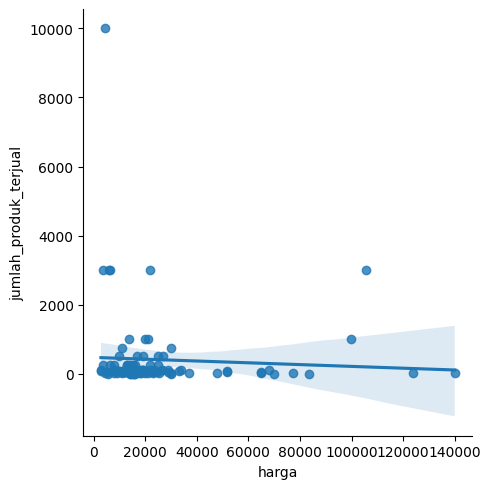

In [163]:
sns.lmplot(data=data,x='harga', y='jumlah_produk_terjual')

## Conclusion

Sebagai data analyst dan calon entrepreuner yang ingin berjualan seblak, saya berhasil menganalisa tren produk seblak yang terjual di Tokopedia. Data saya peroleh menggunakan metode **web scraping**. Setelah mendapatkan data, saya melakukan preparasi data, seperti membersihkan data dari duplikasi dan missing value. 

  Kemudian tren harga dan produk seblak saya dapatkan dari hasil analisa sederhana, seperti melihat dispersi dan distribusi harga. Hasil analisis potensi keuntungan per bulan pun di dapatkan melalui perhitungan confidence interval. Setelah mendapatkan insight dari data tersebut, saya merasa ada peluang bagus untuk berjualan seblak. Oleh karena itu, saya membuat analisis bisnisnya menggunakan SMART framework.